In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

603

In [6]:
# Import the requests library
import requests

# Import the API key
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [15]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [17]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1    

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | barentsburg
City not found. Skipping...
Processing Record 2 of Set 13 | matara
Processing Record 3 of Set 13 | jamestown
Processing Record 4 of Set 13 | haimen
Processing Record 5 of Set 13 | tasiilaq
Processing Record 6 of Set 13 | bubaque
Processing Record 7 of Set 13 | attawapiskat
City not found. Skipping...
Processing Record 8 of Set 13 | atuona
Processing Record 9 of Set 13 | firovo
Processing Record 10 of Set 13 | mount isa
Processing Record 11 of Set 13 | tabarqah
City not found. Skipping...
Processing Record 12 of Set 13 | thompson
Processing Record 13 of Set 13 | kitimat
Processing Record 14 of Set 13 | port alfred
Processing Record 15 of Set 13 | mount gambier
Processing Record 16 of Set 13 | mackay
Processing Record 17 of Set 13 | madang
Processing Record 18 of Set 13 | upernavik
Processing Record 19 of Set 13 | hermanus
Processing Record 20 of Set 13 | mitsamiouli
Processing Record 

Processing Record 29 of Set 16 | celestun
Processing Record 30 of Set 16 | rocha
Processing Record 31 of Set 16 | kuala terengganu
Processing Record 32 of Set 16 | hualmay
Processing Record 33 of Set 16 | asau
Processing Record 34 of Set 16 | petropavlovsk-kamchatskiy
Processing Record 35 of Set 16 | kommunar
Processing Record 36 of Set 16 | ponta do sol
Processing Record 37 of Set 16 | beringovskiy
Processing Record 38 of Set 16 | awbari
Processing Record 39 of Set 16 | atar
Processing Record 40 of Set 16 | tuatapere
Processing Record 41 of Set 16 | beloha
Processing Record 42 of Set 16 | saint george
Processing Record 43 of Set 16 | leningradskiy
Processing Record 44 of Set 16 | lebu
Processing Record 45 of Set 16 | tayshet
Processing Record 46 of Set 16 | dawei
Processing Record 47 of Set 16 | bonthe
Processing Record 48 of Set 16 | gidam
Processing Record 49 of Set 16 | henties bay
Processing Record 50 of Set 16 | hunza
City not found. Skipping...
Processing Record 1 of Set 17 | wa

Processing Record 17 of Set 20 | cervo
Processing Record 18 of Set 20 | husavik
Processing Record 19 of Set 20 | karratha
Processing Record 20 of Set 20 | bathsheba
Processing Record 21 of Set 20 | faya
Processing Record 22 of Set 20 | mahebourg
Processing Record 23 of Set 20 | qui nhon
Processing Record 24 of Set 20 | miyako
Processing Record 25 of Set 20 | fort myers beach
Processing Record 26 of Set 20 | tobe
Processing Record 27 of Set 20 | poplar bluff
Processing Record 28 of Set 20 | solovetskiy
City not found. Skipping...
Processing Record 29 of Set 20 | santa isabel do rio negro
Processing Record 30 of Set 20 | pedasi
Processing Record 31 of Set 20 | pahrump
Processing Record 32 of Set 20 | torbay
Processing Record 33 of Set 20 | wanning
Processing Record 34 of Set 20 | bafata
Processing Record 35 of Set 20 | cabo san lucas
Processing Record 36 of Set 20 | vershino-darasunskiy
Processing Record 37 of Set 20 | starkville
Processing Record 38 of Set 20 | namwala
Processing Record

Processing Record 2 of Set 24 | sao filipe
Processing Record 3 of Set 24 | honningsvag
Processing Record 4 of Set 24 | paita
Processing Record 5 of Set 24 | grindavik
Processing Record 6 of Set 24 | balaka
Processing Record 7 of Set 24 | itarema
Processing Record 8 of Set 24 | masallatah
Processing Record 9 of Set 24 | acari
Processing Record 10 of Set 24 | san ramon de la nueva oran
Processing Record 11 of Set 24 | vagur
Processing Record 12 of Set 24 | sisimiut
Processing Record 13 of Set 24 | puerto ayacucho
Processing Record 14 of Set 24 | tyukhtet
Processing Record 15 of Set 24 | hasaki
Processing Record 16 of Set 24 | maarianhamina
Processing Record 17 of Set 24 | buala
Processing Record 18 of Set 24 | corpus christi
Processing Record 19 of Set 24 | amboise
Processing Record 20 of Set 24 | batagay
Processing Record 21 of Set 24 | aykhal
Processing Record 22 of Set 24 | ufimskiy
Processing Record 23 of Set 24 | dolores
Processing Record 24 of Set 24 | townsville
Processing Record 

In [18]:
len(city_data)

554

In [19]:
# Convert the array of dictionaires to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Matara,5.9485,80.5353,76.03,92,100,2.66,LK,2021-12-05 19:24:57
1,Jamestown,42.0970,-79.2353,42.53,52,90,10.00,US,2021-12-05 19:24:57
2,Haimen,23.1935,116.6142,53.49,76,5,8.25,CN,2021-12-05 19:20:05
3,Tasiilaq,65.6145,-37.6368,30.27,83,97,35.50,GL,2021-12-05 19:24:58
4,Bubaque,11.2833,-15.8333,81.41,65,98,10.85,GW,2021-12-05 19:24:58
5,Atuona,-9.8000,-139.0333,78.48,75,8,21.05,PF,2021-12-05 19:24:59
6,Firovo,57.4814,33.7021,9.00,93,100,7.47,RU,2021-12-05 19:24:59
7,Mount Isa,-20.7333,139.5000,76.77,65,75,8.05,AU,2021-12-05 19:25:00
8,Thompson,55.7435,-97.8558,-14.64,70,20,9.22,CA,2021-12-05 19:25:00
9,Kitimat,54.0524,-128.6534,30.90,45,100,1.16,CA,2021-12-05 19:25:01


In [20]:
new_column_order = ["City","Country", "Date", "Lat", "Lng", "Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Matara,LK,2021-12-05 19:24:57,5.9485,80.5353,76.03,92,100,2.66
1,Jamestown,US,2021-12-05 19:24:57,42.0970,-79.2353,42.53,52,90,10.00
2,Haimen,CN,2021-12-05 19:20:05,23.1935,116.6142,53.49,76,5,8.25
3,Tasiilaq,GL,2021-12-05 19:24:58,65.6145,-37.6368,30.27,83,97,35.50
4,Bubaque,GW,2021-12-05 19:24:58,11.2833,-15.8333,81.41,65,98,10.85
5,Atuona,PF,2021-12-05 19:24:59,-9.8000,-139.0333,78.48,75,8,21.05
6,Firovo,RU,2021-12-05 19:24:59,57.4814,33.7021,9.00,93,100,7.47
7,Mount Isa,AU,2021-12-05 19:25:00,-20.7333,139.5000,76.77,65,75,8.05
8,Thompson,CA,2021-12-05 19:25:00,55.7435,-97.8558,-14.64,70,20,9.22
9,Kitimat,CA,2021-12-05 19:25:01,54.0524,-128.6534,30.90,45,100,1.16


In [21]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [22]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

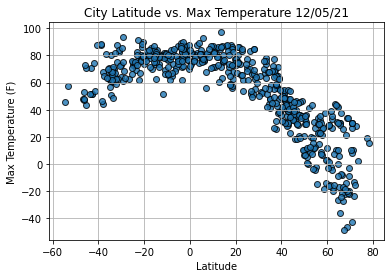

In [23]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

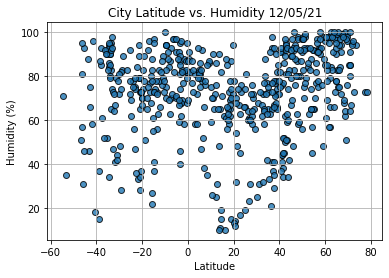

In [24]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

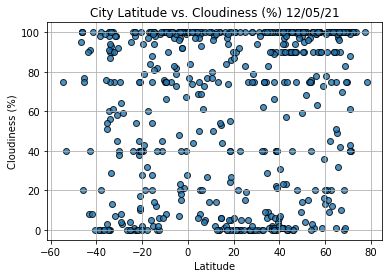

In [25]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

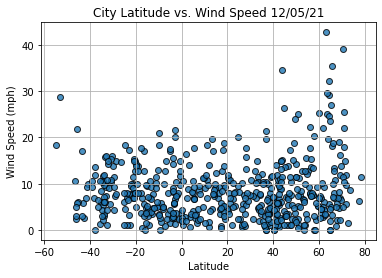

In [26]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()